## Adaboost

판별함수
$$C_{(m-1)}(x_i) =  \text{sign} \left( \alpha_1k_1(x_i) + \cdots + \alpha_{m-1}k_{m-1}(x_i) \right)$$

- Stagewise Additive Modeling
    1. 하나의 개별 모형에서 시작
    1. 모형을 하나씩 추가하여 위원회 멤버 수 증가시킴
    1. 선별 방법 : 지수 손실함수 사용
    
$$E = \sum_{y_i \neq k_m(x_i)} L_i^{(m)} = \sum_{y_i \neq k_m(x_i)} e^{-y_i C_{m-1}(x_i)}$$

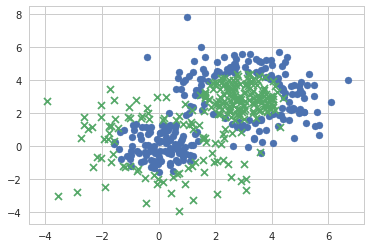

In [1]:
%matplotlib inline
from sklearn.datasets import make_gaussian_quantiles

# Construct dataset
X1, y1 = make_gaussian_quantiles(cov=2.,
                                 n_samples=200, n_features=2,
                                 n_classes=2, random_state=1)
X2, y2 = make_gaussian_quantiles(mean=(3, 3), cov=1.5,
                                 n_samples=300, n_features=2,
                                 n_classes=2, random_state=1)
X = np.concatenate((X1, X2))
y = np.concatenate((y1, - y2 + 1))

plt.scatter(X[y == 0, 0], X[y == 0, 1], marker='o')
plt.scatter(X[y == 1, 0], X[y == 1, 1], marker='x')
plt.show()


In [2]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier().fit(X, y)

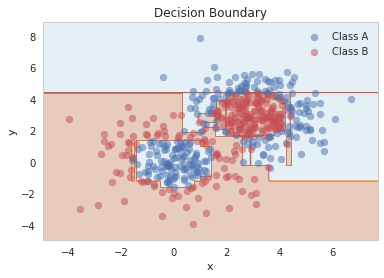

In [3]:
def plot_result(model):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                         np.arange(y_min, y_max, 0.02))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.3)

    for i, n, c in zip(range(2), "AB", "br"):
        idx = np.where(y == i)
        plt.scatter(X[idx, 0], X[idx, 1], c=c, alpha=0.5, label="Class %s" % n)
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.legend(loc='upper right')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Decision Boundary')
    plt.grid(False)
    plt.show()
    
plot_result(tree)

In [4]:
from sklearn.ensemble import AdaBoostClassifier
model_ada = AdaBoostClassifier(DecisionTreeClassifier(max_depth=2, random_state=0), 
                               algorithm="SAMME", n_estimators=100)
model_ada.fit(X, y)

AdaBoostClassifier(algorithm='SAMME',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best'),
          learning_rate=1.0, n_estimators=100, random_state=None)

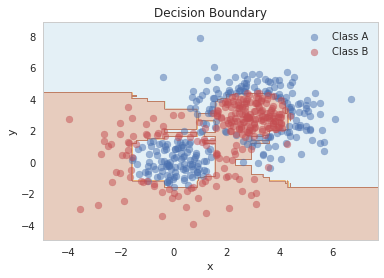

In [5]:
plot_result(model_ada) # learning_rate = 1.0

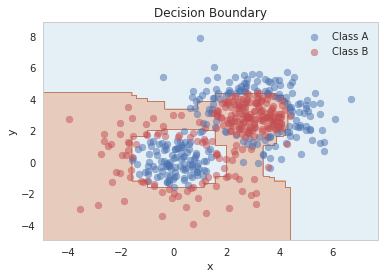

In [12]:
model_ada = AdaBoostClassifier(DecisionTreeClassifier(max_depth=2, random_state=0), 
                               algorithm="SAMME", n_estimators=100, learning_rate=0.3)
model_ada.fit(X, y)
plot_result(model_ada)

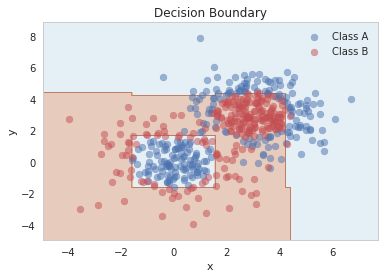

In [8]:
model_ada = AdaBoostClassifier(DecisionTreeClassifier(max_depth=2, random_state=0), 
                               algorithm="SAMME", n_estimators=100, learning_rate=0.05)
model_ada.fit(X, y)
plot_result(model_ada)

---

## Gradient Boost
gradient descent 응용

$$C_{m} = C_{m-1} - \alpha_m \dfrac{dL(y, C_{m-1})}{dC_{m-1}} = C_{m-1} + \alpha_m k_m$$

In [13]:
from sklearn.ensemble import GradientBoostingClassifier

model_grad = GradientBoostingClassifier(n_estimators=100, max_depth=2, random_state=0)

In [14]:
%%time
model_grad.fit(X, y)

CPU times: user 84.4 ms, sys: 67 µs, total: 84.5 ms
Wall time: 84 ms


GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=2,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=0, subsample=1.0, verbose=0,
              warm_start=False)

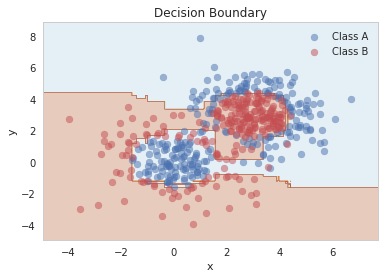

In [15]:
plot_result(model_grad)

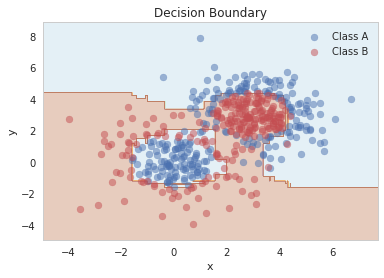

In [21]:
model_grad = GradientBoostingClassifier(learning_rate=0.09,n_estimators=100, max_depth=2, random_state=0).fit(X, y)
plot_result(model_grad)

XGBoost

decision tree에 알맞게 최적화 시킴 - 내부적으로는  extreme
- 훨씬 빠름

In [22]:
import xgboost

model_xgb = xgboost.XGBClassifier(n_estimators=100, max_depth=2).fit(X, y)

/home/mk/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


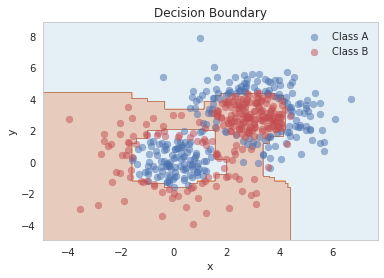

In [23]:
plot_result(model_xgb)